## Tensorflow

In [ ]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [ ]:
dataFrame = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [ ]:
dataFrame

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
...,...,...,...
995,833.920637,1750.033229,1749.427281
996,800.298076,1747.996913,1750.035046
997,799.261737,1752.540381,1747.983310
998,705.802257,1751.349290,1747.484989


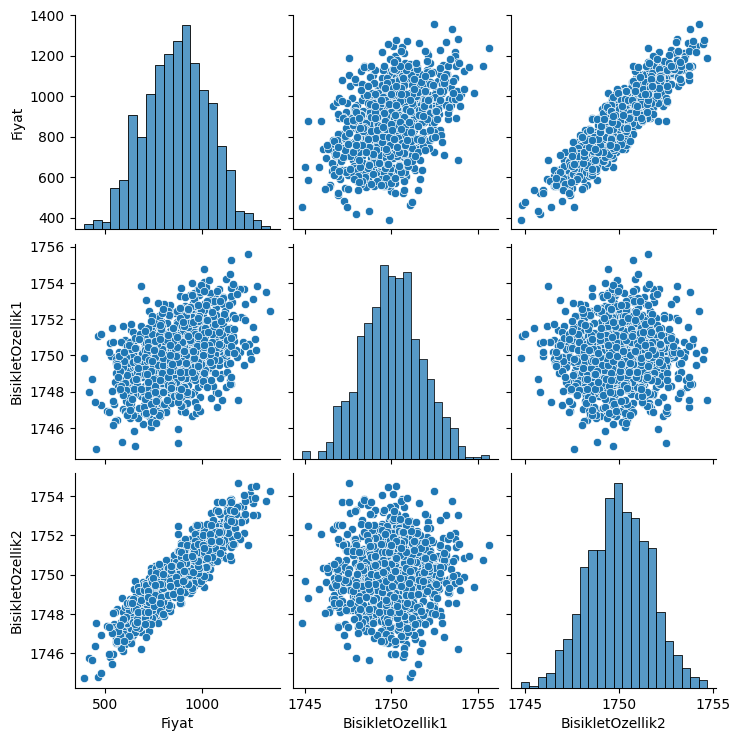

In [ ]:
sbn.pairplot(dataFrame)

## veriyi test/train olarak ikiye ayırmak

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# y = wx 4 b
# y -> label
y = dataFrame["Fiyat"].values

# x -> feature (özellik)
x = dataFrame[["BisikletOzellik1" , "BisikletOzellik2"]].values

In [ ]:
# train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=15)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(670, 2)
(330, 2)
(670,)
(330,)


## scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(x_train)

MinMaxScaler()

In [ ]:
# x_train ve x_test 0 ile 1 arasına getirildi
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
print("TensorFlow Sürümü:", tf.__version__)

TensorFlow Sürümü: 2.15.0


In [ ]:
model = Sequential()


model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1))

model.compile(optimizer= "rmsprop",loss = "mse")

In [ ]:
model.fit(x_train,y_train, epochs=250)

Epoch 1/250
21/21 [==============================] - 1s 3ms/step - loss: 795965.4375
Epoch 2/250
21/21 [==============================] - 0s 2ms/step - loss: 795584.9375
Epoch 3/250
21/21 [==============================] - 0s 3ms/step - loss: 795266.1875
Epoch 4/250
21/21 [==============================] - 0s 2ms/step - loss: 794924.2500
Epoch 5/250
21/21 [==============================] - 0s 2ms/step - loss: 794554.3125
Epoch 6/250
21/21 [==============================] - 0s 2ms/step - loss: 794141.5000
Epoch 7/250
21/21 [==============================] - 0s 2ms/step - loss: 793681.1250
Epoch 8/250
21/21 [==============================] - 0s 2ms/step - loss: 793180.0000
Epoch 9/250
21/21 [==============================] - 0s 2ms/step - loss: 792629.8125
Epoch 10/250
21/21 [==============================] - 0s 2ms/step - loss: 792034.5625
Epoch 11/250
21/21 [==============================] - 0s 2ms/step - loss: 791393.9375
Epoch 12/250
21/21 [==============================] - 0s 2ms/st

In [ ]:
loss = model.history.history["loss"]
loss

[795965.4375,
 795584.9375,
 795266.1875,
 794924.25,
 794554.3125,
 794141.5,
 793681.125,
 793180.0,
 792629.8125,
 792034.5625,
 791393.9375,
 790696.8125,
 789942.9375,
 789127.0,
 788245.625,
 787292.4375,
 786262.3125,
 785150.8125,
 783958.3125,
 782674.4375,
 781305.875,
 779835.125,
 778251.625,
 776569.6875,
 774780.1875,
 772875.0625,
 770843.4375,
 768683.25,
 766395.25,
 763975.8125,
 761426.75,
 758720.3125,
 755877.75,
 752877.4375,
 749729.3125,
 746408.8125,
 742914.625,
 739247.6875,
 735407.3125,
 731412.0,
 727207.0625,
 722812.625,
 718233.625,
 713452.5,
 708451.125,
 703243.9375,
 697826.1875,
 692203.0625,
 686394.5,
 680319.8125,
 674027.25,
 667517.625,
 660740.375,
 653758.0625,
 646519.5625,
 639102.5,
 631372.8125,
 623421.3125,
 615212.6875,
 606759.8125,
 598094.5,
 589171.3125,
 579980.4375,
 570551.3125,
 560870.8125,
 550935.125,
 540705.375,
 530341.5,
 519686.84375,
 508751.125,
 497657.3125,
 486338.53125,
 474766.28125,
 463006.5625,
 450938.78125,

<Axes: >

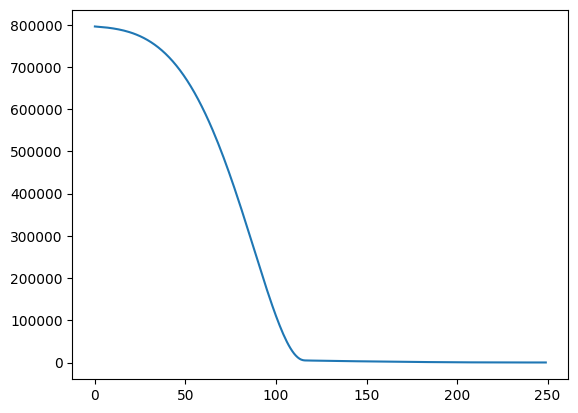

In [ ]:
sbn.lineplot(x=range(len(loss)),y = loss)

In [ ]:
trainLoss = model.evaluate(x_train,y_train,verbose=0)
trainLoss

75.59325408935547

In [ ]:
testLoss = model.evaluate(x_test,y_test,verbose=0)
testLoss

75.94232940673828

In [ ]:
testTahminleri = model.predict(x_test)

11/11 [==============================] - 0s 2ms/step


In [ ]:
testTahminleri

array([[1076.7698 ],
       [ 625.8466 ],
       [ 876.29614],
       [ 895.4265 ],
       [ 900.83905],
       [ 456.5879 ],
       [ 931.35223],
       [ 991.4151 ],
       [ 940.3051 ],
       [1016.2857 ],
       [ 751.98035],
       [ 917.24274],
       [ 948.165  ],
       [1053.6656 ],
       [1119.2765 ],
       [ 683.6704 ],
       [1126.4708 ],
       [ 654.11304],
       [1154.0519 ],
       [ 886.70435],
       [ 893.1689 ],
       [ 717.583  ],
       [ 459.33972],
       [ 615.4147 ],
       [ 835.26025],
       [1089.6785 ],
       [ 715.6613 ],
       [ 758.5102 ],
       [ 874.5008 ],
       [ 772.0834 ],
       [ 455.26886],
       [ 783.7077 ],
       [ 729.9122 ],
       [ 649.3944 ],
       [ 887.3347 ],
       [ 844.6432 ],
       [1034.8334 ],
       [1022.89746],
       [ 845.30475],
       [ 863.1189 ],
       [ 758.3043 ],
       [1173.4688 ],
       [1096.4724 ],
       [1086.5975 ],
       [ 872.6394 ],
       [ 598.9963 ],
       [1145.4192 ],
       [ 973.

In [ ]:
tahminDf = pd.DataFrame(y_test,columns=["Gerçek Y"])

In [ ]:
tahminDf

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [ ]:
testTahminleri2 = pd.Series(testTahminleri.reshape(330,))

In [ ]:
tahminDf2 = pd.concat([tahminDf,testTahminleri2],axis=1)

In [ ]:
tahminDf2

,Gerçek Y,0
0,1081.652164,1076.769775
1,622.675990,625.846619
2,889.356810,876.296143
3,902.826733,895.426514
4,897.662404,900.839050
...,...,...
325,1028.438035,1012.771729
326,789.934950,792.505737
327,758.490486,766.789246
328,1172.871659,1165.630249


In [ ]:
tahminDf2.columns = ["Gerçek Y", "Tahmin Y"]

In [ ]:
tahminDf2

,Gerçek Y,Tahmin Y
0,1081.652164,1076.769775
1,622.675990,625.846619
2,889.356810,876.296143
3,902.826733,895.426514
4,897.662404,900.839050
...,...,...
325,1028.438035,1012.771729
326,789.934950,792.505737
327,758.490486,766.789246
328,1172.871659,1165.630249


<Axes: xlabel='Gerçek Y', ylabel='Tahmin Y'>

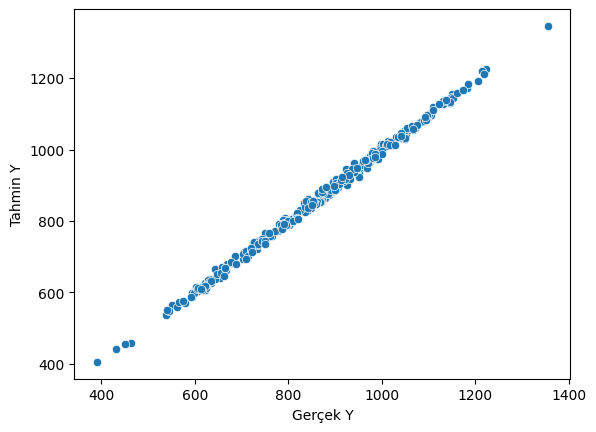

In [ ]:
sbn.scatterplot(x = "Gerçek Y", y = "Tahmin Y", data = tahminDf2)

In [ ]:
# tahminDf2.to_excel("tahmin.xlsx")

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error(tahminDf2["Gerçek Y"],tahminDf2["Tahmin Y"])

6.976381244438921

In [ ]:
mean_squared_error(tahminDf2["Gerçek Y"],tahminDf2["Tahmin Y"])

75.94233430661828

In [ ]:
yeniBisikletOzellikleri = [[1751,1750]]

In [ ]:
yeniBisikletOzellikleri_scaled = scaler.transform(yeniBisikletOzellikleri)

In [ ]:
model.predict(yeniBisikletOzellikleri_scaled)

1/1 [==============================] - 0s 44ms/step


array([[914.2887]], dtype=float32)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save("bisiklet_modeli.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
sonradanCagirilanModel= load_model("bisiklet_modeli.h5")

In [ ]:
sonradanCagirilanModel.predict(yeniBisikletOzellikleri_scaled)

1/1 [==============================] - 0s 79ms/step


array([[914.2887]], dtype=float32)